In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import cv2
import statistics
import skimage as ski
from skimage.morphology import square,disk
from scipy import signal
from scipy import stats

## Define Existing BG Subtractions

In [3]:
#Load in Data function
def load_data(event_no,spectro_no):
    
    files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[event_no],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    RIF = f['AwakeEventData']['Sps2AwakeSynchro']['ProtonDelayNs']['delay'][0]
    density = f['AwakeEventData']['TSG41.AWAKE-DENSITY-DATA']['ValueAcquisition']['floatValue'][2]
    
    return files,data, protons, RIF, density

In [4]:
#Load in Data function
def load_rif(event_no,spectro_no):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[event_no],'r')
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    RIF = f['AwakeEventData']['Sps2AwakeSynchro']['ProtonDelayNs']['delay'][0]
    
    return protons, RIF

In [5]:
## simple function to load in and plot spectrometer data
def subtract_sensor(date,event_no,spectro_no,mean):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    fig = np.array((f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]))-mean
    
    return fig

## Select a RIF and proton count to look at

In [6]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')
list_rifs = []

for i in np.arange(0,10,1):
    protons, rif = load_rif(i,1)
    
    if not rif in list_rifs:
        list_rifs.append(rif)
        
print(list_rifs)

[1121740.769, 1121740.74]


In [7]:
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

rif_data = {}

for i in np.arange(0,10,1):
    
    files,data,protons,rif,density = load_data(i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4)) 
    
    if rif not in rif_data:
        rif_data[rif] = {'fit_parameters': [], 'proton_count': [],'density': []}

    # Store values for the corresponding RIF
    rif_data[rif]['fit_parameters'].append(np.mean(w_median_filter))
    rif_data[rif]['proton_count'].append(protons)
    rif_data[rif]['density'].append(density)

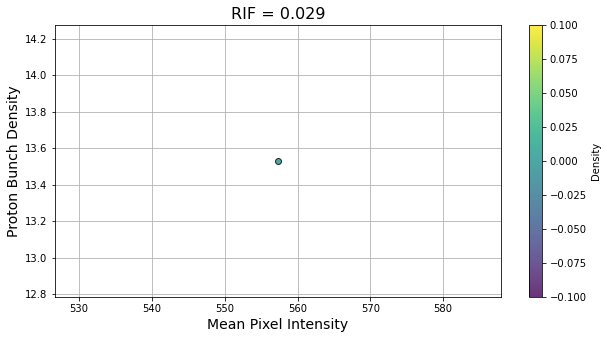

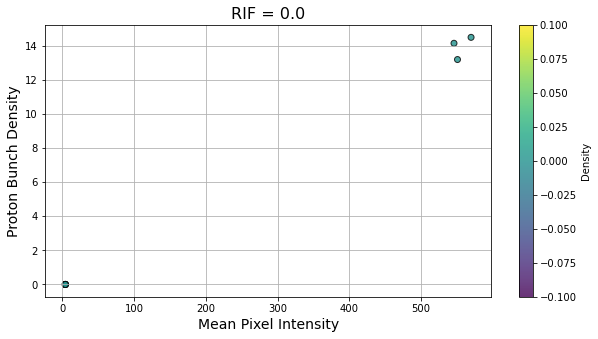

In [8]:
for rif, data in rif_data.items():
    fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure for each RIF
    sc = ax.scatter(data['fit_parameters'], data['proton_count'], 
                    c=data['density'], cmap='viridis', edgecolors='k', alpha=0.8,vmin=0,vmax=np.max(data['density']))

    # Add colorbar to indicate density levels
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Density')
    
    ax.set_title(f'RIF = {round(rif-1121740.74,4)}', fontsize=16)
    ax.set_xlabel('Mean Pixel Intensity', fontsize=14)
    ax.set_ylabel('Proton Bunch Density', fontsize=14)
    ax.grid()
    
    #plt.savefig(r'C:\Users\bethx\OneDrive\Documents\UCL_Masters\Research_Project\powerpoint_rif_04_05'{round(rif-1121740.74,4)}'.png')
    plt.show()  # Show each plot separately